<a href="https://colab.research.google.com/github/Baeltor/DSI/blob/main/Modelo_de_clasificaci%C3%B3n_de_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importe de librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.metrics import RocCurveDisplay, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)
#from sklearn.ensemble import RandomForestClassifier


In [ ]:
df=pd.read_csv("/content/Trojan_Detection.csv", index_col = 0)
df.columns = df.columns.str.strip() # Quitamos los espacios al inicio y fin de los encabezados
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,4,372.0,672.0,372.0,0.0,93.000000,186.000000,672.0,0.0,168.000000,336.000000,97.174276,0.744630,1.534798e+06,3.734695e+06,9995178.0,500.0,748406.0,2.494687e+05,2.156295e+05,376606.0,500.0,10375411.0,3.458470e+06,5.668286e+06,10000076.0,557.0,0,0,0,0,100,92,0.372315,0.372315,0.0,672.0,116.000000,242.090892,58608.000000,0,0,0,1,0,0,0,0,1.0,130.500000,93.000000,168.000000,100,0,0,0,0,0,0,4,372,4,672,65535,511,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,7,3191.0,5246.0,1350.0,38.0,531.833333,645.216062,1350.0,30.0,749.428571,678.206423,33188.181750,51.137414,2.118475e+04,2.336312e+04,62569.0,18.0,191648.0,3.832960e+04,3.283050e+04,75355.0,288.0,201740.0,3.362333e+04,3.524305e+04,75784.0,18.0,0,0,0,0,204,216,23.601883,27.535531,30.0,1350.0,699.071429,647.514356,419274.840659,0,0,0,0,0,0,0,0,1.0,752.846154,531.833333,749.428571,204,0,0,0,0,0,0,6,3191,7,5246,-1,-1,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,1,30.0,179.0,30.0,30.0,30.000000,0.000000,179.0,179.0,179.000000,0.000000,204.252358,1.954568,1.023244e+06,0.000000e+00,1023244.0,1023244.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,32,20,0.977284,0.977284,30.0,179.0,79.666667,86.025190,7400.333333,0,0,0,0,0,0,0,0,1.0,119.500000,30.000000,179.000000,32,0,0,0,0,0,0,1,30,1,179,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,1,40.0,106.0,40.0,40.0,40.000000,0.000000,106.0,106.0,106.000000,0.000000,509.628844,6.981217,2.864830e+05,0.000000e+00,286483.0,286483.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,20,20,3.490609,3.490609,40.0,106.0,62.000000,38.105118,1452.000000,0,0,0,0,0,0,0,0,1.0,93.000000,40.000000,106.000000,20,0,0,0,0,0,0,1,40,1,106,-1,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,10,767.0,5622.0,403.0,0.0,63.916667,130.001719,1448.0,0.0,562.200000,649.538948,97.344195,0.335197,3.125385e+06,1.314689e+07,60306983.0,3.0,60633649.0,5.512150e+06,1.817477e+07,60311055.0,304.0,65582235.0,7.286915e+06,1.996521e+07,60346619.0,3.0,0,0,0,0,392,328,0.182835,0.152362,0.0,1448.0,277.782609,496.257444,246271.450593,0,0,0,1,0,0

### **Análisis de los datos**

In [ ]:
df.shape

(177482, 85)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177482 entries, 73217 to 167491
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      177482 non-null  object 
 1   Source IP                    177482 non-null  object 
 2   Source Port                  177482 non-null  int64  
 3   Destination IP               177482 non-null  object 
 4   Destination Port             177482 non-null  int64  
 5   Protocol                     177482 non-null  int64  
 6   Timestamp                    177482 non-null  object 
 7   Flow Duration                177482 non-null  int64  
 8   Total Fwd Packets            177482 non-null  int64  
 9   Total Backward Packets       177482 non-null  int64  
 10  Total Length of Fwd Packets  177482 non-null  float64
 11  Total Length of Bwd Packets  177482 non-null  float64
 12  Fwd Packet Length Max        177482 non-null  float64
 13  

In [ ]:
df = df.dropna()
df.shape

(177482, 85)

In [ ]:
df['Class'].value_counts()

Class
Trojan    90683
Benign    86799
Name: count, dtype: int64

In [ ]:
df['Class'].value_counts(normalize=True)

Class
Trojan    0.510942
Benign    0.489058
Name: proportion, dtype: float64

*
*
*
Seleccionar características, de acuerdo al análisis de datos inicial
*
*
*

In [ ]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584.0,4.0,4.0,372.0,672.0,372.0,0.0,93.000000,186.000000,672.0,0.0,168.000000,336.000000,97.174276,0.744630,1.534798e+06,3.734695e+06,9995178.0,500.0,748406.0,2.494687e+05,2.156295e+05,376606.0,500.0,10375411.0,3.458470e+06,5.668286e+06,10000076.0,557.0,0.0,0.0,0.0,0.0,100.0,92.0,0.372315,0.372315,0.0,672.0,116.000000,242.090892,58608.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,130.500000,93.000000,168.000000,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,372.0,4.0,672.0,65535.0,511.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217.0,6.0,7.0,3191.0,5246.0,1350.0,38.0,531.833333,645.216062,1350.0,30.0,749.428571,678.206423,33188.181750,51.137414,2.118475e+04,2.336312e+04,62569.0,18.0,191648.0,3.832960e+04,3.283050e+04,75355.0,288.0,201740.0,3.362333e+04,3.524305e+04,75784.0,18.0,0.0,0.0,0.0,0.0,204.0,216.0,23.601883,27.535531,30.0,1350.0,699.071429,647.514356,419274.840659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,752.846154,531.833333,749.428571,204.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3191.0,7.0,5246.0,-1.0,-1.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244.0,1.0,1.0,30.0,179.0,30.0,30.0,30.000000,0.000000,179.0,179.0,179.000000,0.000000,204.252358,1.954568,1.023244e+06,0.000000e+00,1023244.0,1023244.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,32.0,20.0,0.977284,0.977284,30.0,179.0,79.666667,86.025190,7400.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,119.500000,30.000000,179.000000,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,1.0,179.0,-1.0,-1.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483.0,1.0,1.0,40.0,106.0,40.0,40.0,40.000000,0.000000,106.0,106.0,106.000000,0.000000,509.628844,6.981217,2.864830e+05,0.000000e+00,286483.0,286483.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,3.490609,3.490609,40.0,106.0,62.000000,38.105118,1452.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,93.000000,40.000000,106.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0,1.0,106.0,-1.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087.0,12.0,10.0,767.0,5622.0,403.0,0.0,63.916667,130.001719,1448.0,0.0,562.200000,649.538

In [ ]:
df.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [ ]:
df = df.drop(['Flow ID', 'RST Flag Count','CWE Flag Count', 'ECE Flag Count'], axis=1)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
73217,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,4,372.0,672.0,372.0,0.0,93.000000,186.000000,672.0,0.0,168.000000,336.000000,97.174276,0.744630,1.534798e+06,3.734695e+06,9995178.0,500.0,748406.0,2.494687e+05,2.156295e+05,376606.0,500.0,10375411.0,3.458470e+06,5.668286e+06,10000076.0,557.0,0,0,0,0,100,92,0.372315,0.372315,0.0,672.0,116.000000,242.090892,58608.000000,0,0,0,1,0,0,0,0,1.0,130.500000,93.000000,168.000000,100,0,0,0,0,0,0,4,372,4,672,65535,511,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
72089,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,7,3191.0,5246.0,1350.0,38.0,531.833333,645.216062,1350.0,30.0,749.428571,678.206423,33188.181750,51.137414,2.118475e+04,2.336312e+04,62569.0,18.0,191648.0,3.832960e+04,3.283050e+04,75355.0,288.0,201740.0,3.362333e+04,3.524305e+04,75784.0,18.0,0,0,0,0,204,216,23.601883,27.535531,30.0,1350.0,699.071429,647.514356,419274.840659,0,0,0,0,0,0,0,0,1.0,752.846154,531.833333,749.428571,204,0,0,0,0,0,0,6,3191,7,5246,-1,-1,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
96676,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,1,30.0,179.0,30.0,30.0,30.000000,0.000000,179.0,179.0,179.000000,0.000000,204.252358,1.954568,1.023244e+06,0.000000e+00,1023244.0,1023244.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,32,20,0.977284,0.977284,30.0,179.0,79.666667,86.025190,7400.333333,0,0,0,0,0,0,0,0,1.0,119.500000,30.000000,179.000000,32,0,0,0,0,0,0,1,30,1,179,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
42891,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,1,40.0,106.0,40.0,40.0,40.000000,0.000000,106.0,106.0,106.000000,0.000000,509.628844,6.981217,2.864830e+05,0.000000e+00,286483.0,286483.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,20,20,3.490609,3.490609,40.0,106.0,62.000000,38.105118,1452.000000,0,0,0,0,0,0,0,0,1.0,93.000000,40.000000,106.000000,20,0,0,0,0,0,0,1,40,1,106,-1,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
169326,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,10,767.0,5622.0,403.0,0.0,63.916667,130.001719,1448.0,0.0,562.200000,649.538948,97.344195,0.335197,3.125385e+06,1.314689e+07,60306983.0,3.0,60633649.0,5.512150e+06,1.817477e+07,60311055.0,304.0,65582235.0,7.286915e+06,1.996521e+07,60346619.0,3.0,0,0,0,0,392,328,0.182835,0.152362,0.0,1448.0,277.782609,496.257444,246271.450593,0,0,0,1,0,0,0,0,0.0,290.409091,63.916667,562.200000,392,0,0,0,0,0,0,12,767,10,5622,65535,79,3,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,Benign
...,...,...,...,...,...,.

In [ ]:
df[['FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count']].describe()

,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count
count,177482.000000,177482.000000,177482.0,177482.000000,177482.000000,177482.000000,177482.0,177482.0
mean,0.011212,0.081197,0.0,0.323312,0.447640,0.213825,0.0,0.0
std,0.105294,0.273138,0.0,0.467742,0.497252,0.410006,0.0,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0


In [ ]:
df.select_dtypes(include='number').corr()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Source Port,1.000000,-0.710282,-0.096631,0.126908,0.072241,0.032071,0.050839,0.025588,0.211155,-0.074645,0.108174,0.208593,0.244174,-0.073221,0.194031,0.247544,-0.021926,-0.075851,0.100144,0.091239,0.160855,0.084413,0.095007,0.114060,0.099845,0.136381,0.080696,0.112950,0.037614,0.075669,0.111532,0.017876,-0.033871,NaN,NaN,NaN,0.074696,0.034213,-0.109360,0.040168,-0.021006,0.252213,0.194810,0.237316,0.216524,0.031723,-0.033871,NaN,0.303498,-0.173242,-0.229468,NaN,NaN,-0.212690,0.187162,0.108174,0.194031,0.074696,NaN,NaN,NaN,NaN,NaN,NaN,0.072241,0.050839,0.032071,0.025588,0.317145,-0.018693,0.092473,0.003277,0.068427,0.014634,0.063973,0.067352,0.066704,0.019887,0.066310,0.065807
Destination Port,-0.710282,1.000000,-0.165186,-0.135386,-0.059508,-0.028456,-0.038100,-0.024242,-0.163946,0.037698,-0.082299,-0.155094,-0.219256,-0.130576,-0.200706,-0.197806,0.039023,0.119051,-0.105318,-0.080288,-0.140838,-0.086166,-0.121386,-0.114085,-0.101385,-0.131453,-0.074268,-0.066658,0.005742,-0.031171,-0.067019,0.002917,0.107441,NaN,NaN,NaN,-0.058802,-0.030193,0.158487,-0.031759,-0.067673,-0.214552,-0.179770,-0.201573,-0.170916,-0.019451,0.107441,NaN,-0.243144,0.379447,0.377789,NaN,NaN,0.174348,-0.185194,-0.082299,-0.200706,-0.058802,NaN,NaN,NaN,NaN,NaN,NaN,-0.059508,-0.038100,-0.028456,-0.024242,-0.250321,0.061178,-0.067539,0.037283,-0.051000,-0.007334,-0.046767,-0.051467,-0.066280,-0.028509,-0.067513,-0.063390
Protocol,-0.096631,-0.165186,1.000000,-0.262353,-0.070046,-0.032686,-0.008224,-0.027739,-0.096863,0.179104,0.033201,-0.117727,-0.110718,0.599773,-0.056707,-0.191833,-0.014016,-0.068135,-0.192975,-0.205891,-0.256938,-0.116358,-0.220113,-0.192664,-0.167162,-0.215760,-0.124515,-0.149598,-0.097607,-0.129209,-0.150076,-0.042362,-0.150318,NaN,NaN,NaN,-0.065961,-0.034114,-0.061826,-0.050499,0.283659,-0.149823,-0.054878,-0.132053,-0.156882,-0.053846,-0.150318,NaN,-0.349518,-0.455205,-0.263708,NaN,NaN,0.273081,-0.012880,0.033201,-0.056707,-0.065961,NaN,NaN,NaN,NaN,NaN,NaN,-0.070046,-0.008224,-0.032686,-0.027739,-0.375907,-0.112098,0.003692,0.175507,-0.072723,-0.035399,-0.073811,-0.066391,-0.151297,-0.071862,-0.155908,-0.143147
Flow Duration,0.126908,-0.135386,-0.262353,1.000000,0.123910,0.050607,0.089637,0.033185,0.238786,-0.038737,0.117970,0.197749,0.237035,-0.154369,0.169644,0.242996,-0.051910,-0.077697,0.494997,0.729168,0.944731,0.237502,0.822499,0.494436,0.596497,0.756498,0.255446,0.764998,0.418674,0.622323,0.725276,0.147024,0.052395,NaN,NaN,NaN,0.118821,0.054560,-0.071142,-0.056065,-0.019072,0.254355,0.191027,0.226632,0.207869,-0.052613,0.052395,NaN,0.258331,-0.081144,-0.131728,NaN,NaN,-0.096306,0.174596,0.117970,0.169644,0.118821,NaN,NaN,Na

.
.
.

## **Modelado**

Dividimos el contunto de datos en entrenamiento y pruebas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'], axis=1), df['Class'],
                                                    test_size=0.3, random_state=123)

Selección de carácterísticas por tipo de dato

In [ ]:
numeric_features = df.drop(['Class'],
                           axis=1).select_dtypes(include=['number']).columns
categorical_features = df.drop(['Class'],
                               axis=1).select_dtypes(include=['object']).columns

In [ ]:
print(numeric_features)
print(categorical_features)

Index(['Source Port', 'Destination Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag 

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
mrl = Pipeline(steps=[('preprocessor', preprocessor),
                      ('logistic_regressor', LogisticRegression())])

In [ ]:
mrl

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Pa...
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Flow ID', ' Source IP', ' Destination IP', ' Timestamp'], dtype='object'))])),
                ('logistic_regressor', LogisticRegression())])

In [ ]:
mrl.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Pa...
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Flow ID', ' Source IP', ' Destination IP', ' Timestamp'], dtype='object'))])),
                ('logistic_regressor', LogisticRegression())])

* Métricas para el conjunto de entrenamiento

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (train set)')

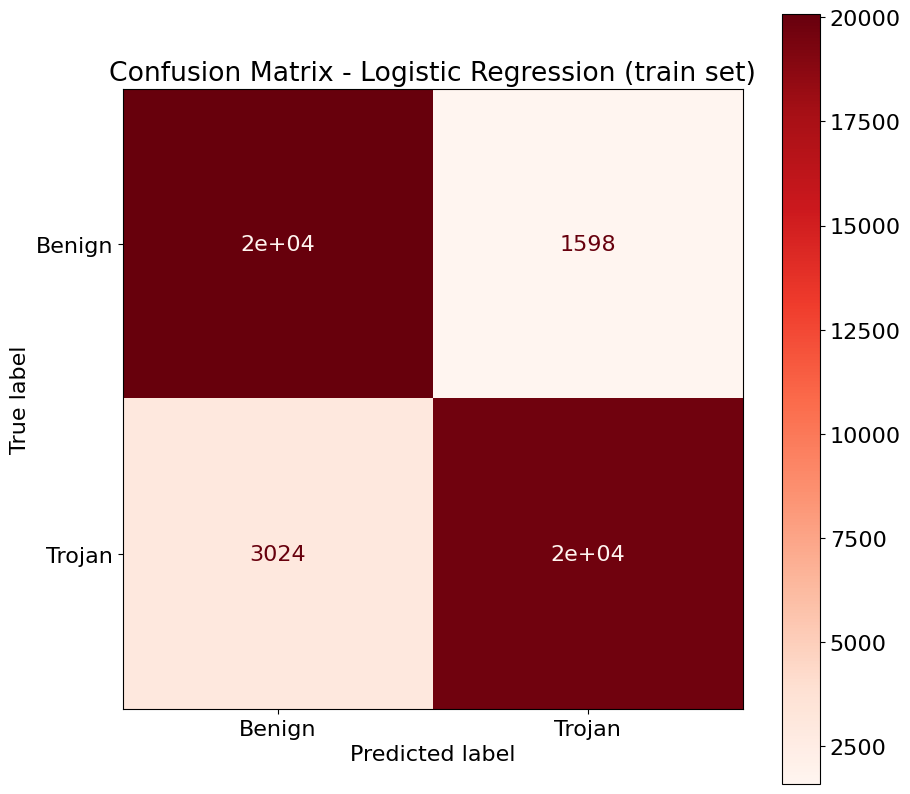

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(mrl,
                                             X_train,
                                             y_train,
                                             display_labels=mrl.classes_,
                                             cmap=plt.cm.Reds,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - Logistic Regression (train set)')

In [ ]:
ypred = mrl.predict(X_train)
target_names = ['Benign', 'Trojan']
print(classification_report(y_train, ypred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.87      0.93      0.90     21674
      Trojan       0.92      0.87      0.90     22729

    accuracy                           0.90     44403
   macro avg       0.90      0.90      0.90     44403
weighted avg       0.90      0.90      0.90     44403



Métricas sobre el conjunto de pruebas

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (test set)')

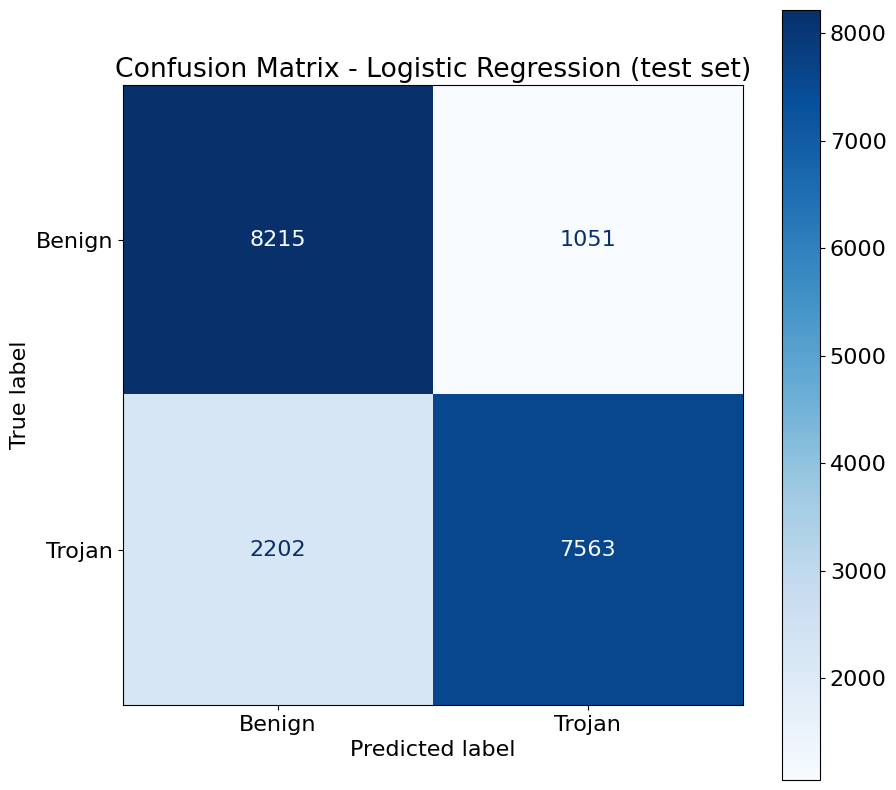

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(mrl,
                                             X_test,
                                             y_test,
                                             display_labels=mrl.classes_,
                                             cmap=plt.cm.Blues,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - Logistic Regression (test set)')

In [ ]:
ypred_test = mrl.predict(X_test)
target_names = ['Benign', 'Trojan']
print(classification_report(y_test, ypred_test, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.79      0.89      0.83      9266
      Trojan       0.88      0.77      0.82      9765

    accuracy                           0.83     19031
   macro avg       0.83      0.83      0.83     19031
weighted avg       0.83      0.83      0.83     19031



Curva ROC y AUC

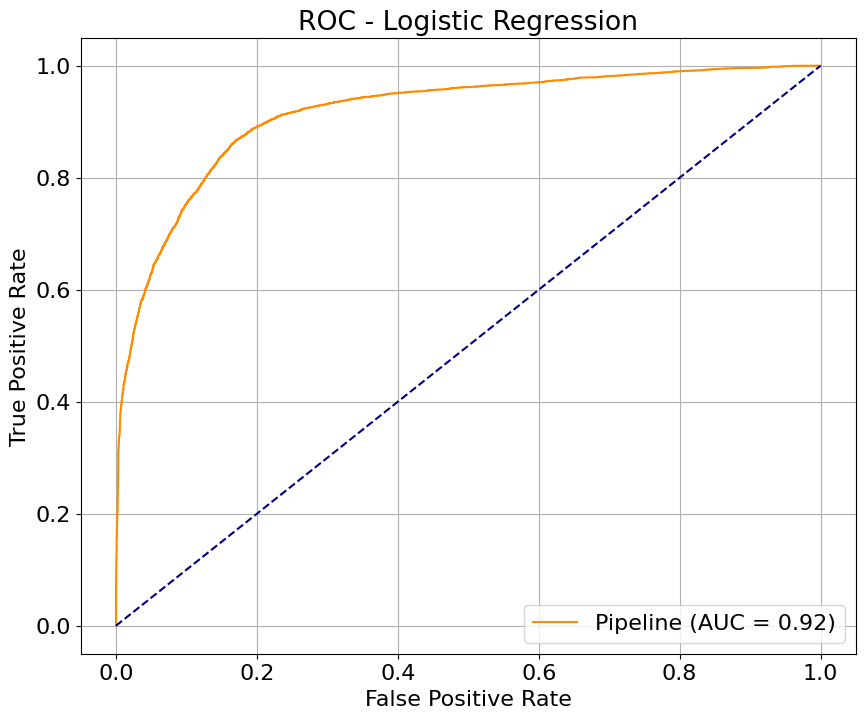

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
RocCurveDisplay.from_estimator(mrl, X_test, y_test, ax=ax, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Logistic Regression")
plt.grid()
plt.show()

## Ajustar otro modelo

In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [ ]:
rfc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('KNN_classifier', RandomForestClassifier(n_jobs=-1))])

In [ ]:
from time import time
ini = time()

rfc.fit(X_train, y_train)

fin = time()
print(f'El tiempo de entrenamiento en segundos fue de: {fin-ini}')

El tiempo de entrenamiento en segundos fue de: 240.26069617271423


Text(0.5, 1.0, 'Confusion Matrix - RFC (train set)')

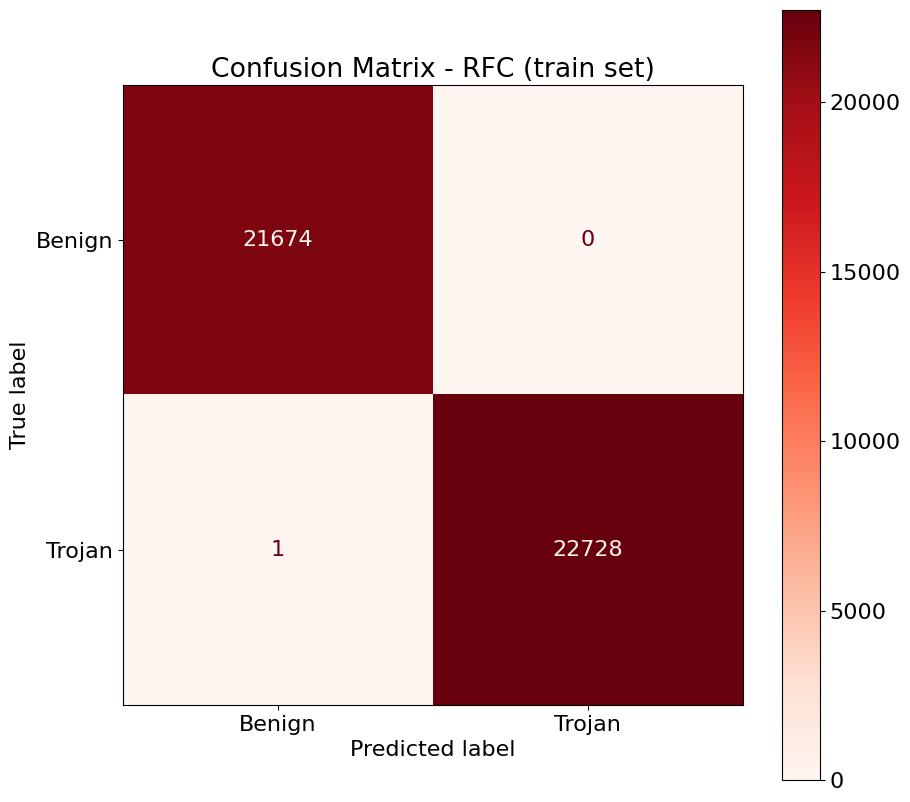

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(rfc,
                                             X_train,
                                             y_train,
                                             display_labels=mrl.classes_,
                                             cmap=plt.cm.Reds,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - RFC (train set)')

In [ ]:
y_pred = rfc.predict(X_train)
target_names = ['Benign', 'Trojan']
print(classification_report(y_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     21674
      Trojan       1.00      1.00      1.00     22729

    accuracy                           1.00     44403
   macro avg       1.00      1.00      1.00     44403
weighted avg       1.00      1.00      1.00     44403



Text(0.5, 1.0, 'Confusion Matrix - RFC (test set)')

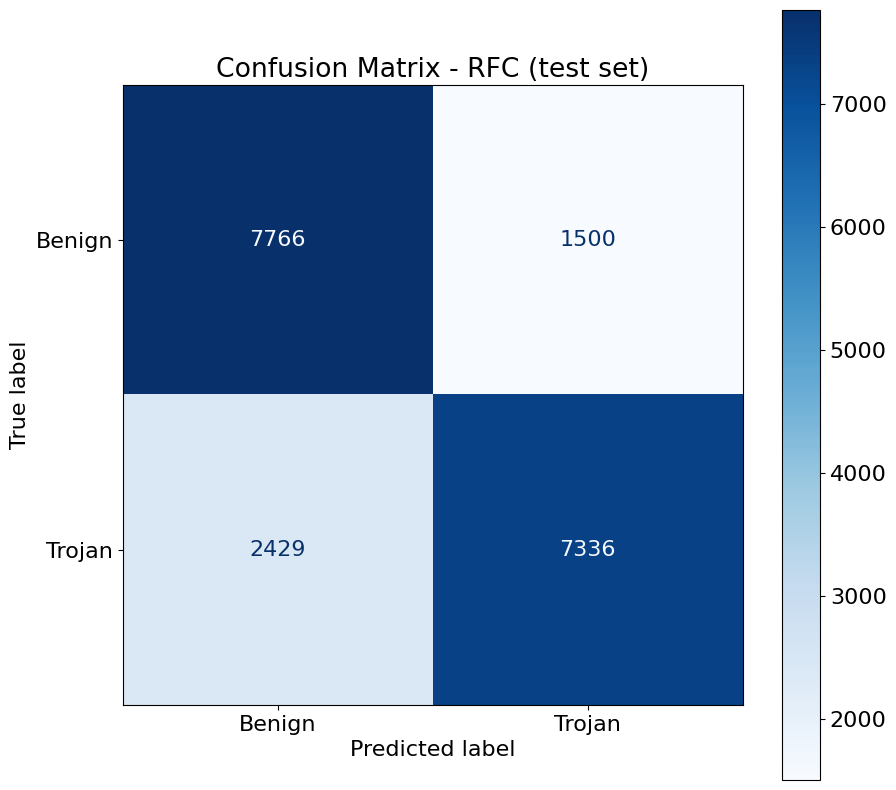

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(rfc,
                                             X_test,
                                             y_test,
                                             display_labels=mrl.classes_,
                                             cmap=plt.cm.Blues,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - RFC (test set)')

In [ ]:
ypred_test = rfc.predict(X_test)
target_names = ['Benign', 'Trojan']
print(classification_report(y_test, ypred_test, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.76      0.84      0.80      9266
      Trojan       0.83      0.75      0.79      9765

    accuracy                           0.79     19031
   macro avg       0.80      0.79      0.79     19031
weighted avg       0.80      0.79      0.79     19031



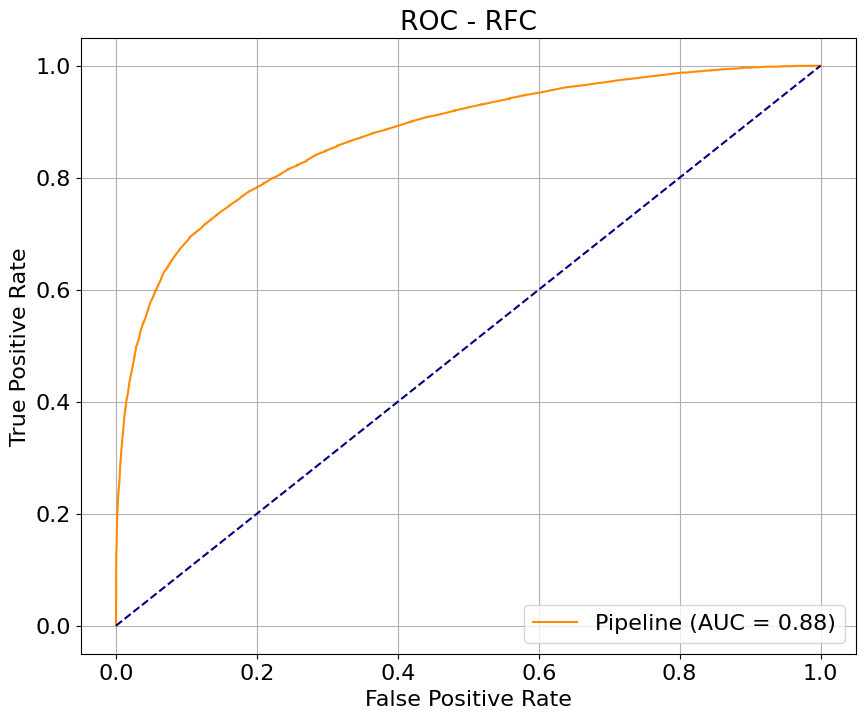

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - RFC")
plt.grid()
plt.show()